# Decision Trees and Random Forest Project - Classifying Sloan Digital Sky Survey Data

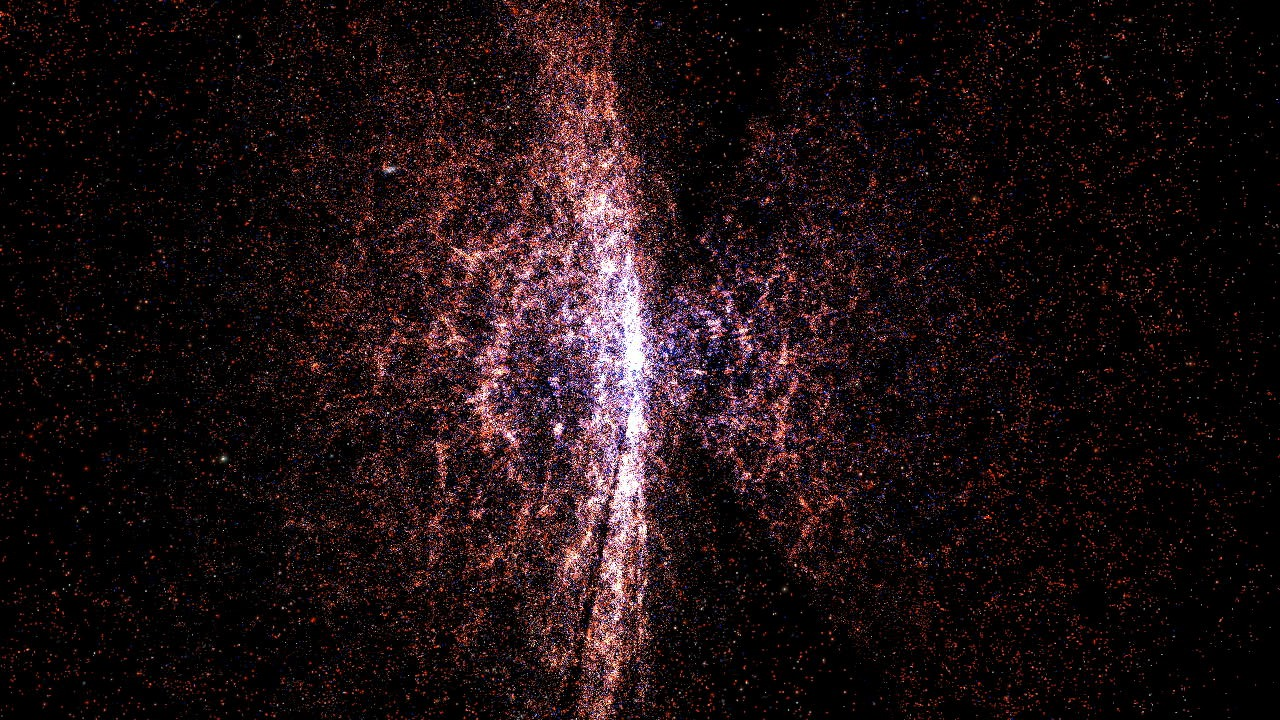

### 1. Answer the following questions in the cell below.
a. What is the purpose of using a metric such as information gain (generally quantified as Gini impurity or entropy) in a decision tree?

b. Explain overfitting a model in a sentence or two.

c. How do random forests relate to decision trees?

d. How do the different trees within a random forest get generated?

e. Name a real-world situation where a decision tree could be used.

a. A Gini impurity or entropy measures the probability of a randomly chosen instance being misclassified in a decision tree.

b. Overfitting is the phenomenom in which the model is fit too well to a specific randomness of a training dataset and because of this fails on the testing dataset because it is too sensitive to the training dataset's randomness.

c. A random forest is a series of decisions trees made to create a single result, specifically with very little error due to their ability to reduce overfitting.

d. The individual decision trees are created through machine learning algorithms; the trees are then aggregated for the creation of the random forest.

e. Most classification problems can be solved efficiently through a decision tree because they're predictive models. For instance, a company deciding which city to build a new location based on various factors.

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data to classify and predict whether or not the borrower paid back their loan in full. You can use the csv already provided. The only change from the raw data is that it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

## Import Libraries

Import the usual libraries for pandas and plotting. You can import sklearn later on.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Important Upgrade Needed

You may need a more recent version of sklearn than Anaconda contains. To get the latest, run this command in Anaconda Powershell and then restart Anaconda:

pip install --user --upgrade scikit-learn

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [35]:
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [36]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [37]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [38]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

Check loans.info() again.

In [39]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.

In [40]:
cat_feats = ['purpose']

Now use pd.get_dummies function to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.

In [41]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [42]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Note how the purpose column has been expanded to six columns, one for each category that appeared in the purpose column. A 0 or 1 appears in each of these columns.

In [43]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=500)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [46]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree

Create predictions from the test set and create a classification report and a confusion matrix.

In [49]:
predictions = dtree.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1610
           1       0.20      0.21      0.20       306

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.74      1916



### 2. What do the following mean?

Precision: the count of true positives divided by the number of true positives and false positives

Recall: the count of true positives divided by the number of elements that belong to the positive class

f1-score: shows accuracy on how often the algorithm got the prediction correct

Support: frequency of items in the data 

In [52]:
print(confusion_matrix(y_test,predictions))

[[1343  267]
 [ 241   65]]


### 3. What is a confusion matrix? What do each of the numbers above mean?

The confusion matrix gives a visualization of the results of the model (what went wrong and what went right). The top row shows (from left to right) the true positives and false positives and the second row shows (from left to right) false negatives and true negatives. 

## Training the Random Forest model

Now its time to train our model!

Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=600)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [56]:
predictions = rfc.predict(X_test)

We now create a classification report from the results.

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1610
           1       0.29      0.01      0.01       306

    accuracy                           0.84      1916
   macro avg       0.56      0.50      0.46      1916
weighted avg       0.75      0.84      0.77      1916



**Show the Confusion Matrix for the predictions.**

In [59]:
print(confusion_matrix(y_test,predictions))

[[1605    5]
 [ 304    2]]


### 4. Interpret the results above. Which performed better, the decision tree or random forest model?

The random forest model performed better. The total of false positives and negatives is far fewer than that of the decision tree model. The number of true positives increased significantly; however, the number of false negatives also increased slightly.

### 5. Download the dataset at https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey.

The data consists of 10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. Read what each column represents.

Feature Description
The table results from a query which joins two tables (actuaclly views): "PhotoObj" which contains photometric data and "SpecObj" which contains spectral data.

To ease your start with the data you can read the feature descriptions below:

View "PhotoObj"

* objid = Object Identifier
* ra = J2000 Right Ascension (r-band)
* dec = J2000 Declination (r-band)
* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit
* run = Run Number
* rerun = Rerun Number
* camcol = Camera column
* field = Field number
* run number, which identifies the specific scan,
* the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
* the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
* An additional number, rerun, specifies how the image was processed.

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

Source: https://en.wikipedia.org/wiki/Right_ascension

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.

Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:


View "SpecObj"

* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object)
* redshift = Final Redshift
* plate = plate number
* mjd = MJD of observation
* fiberid = fiber ID

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

### 6. Read the file into a pandas DataFrame and remove the irrelevant columns.

In [60]:
df = pd.read_csv('Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df = df.drop(columns=['objid','specobjid','run','rerun','camcol','field', 'mjd','fiberid','ra','dec','plate'])
df.head()

,u,g,r,i,z,class,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590


### 7. Implement a decision tree classifier on the sky survey data and determine how well it works on classifying the objects as a star, galaxy, or quasar.

In [88]:
x = df.drop('class', axis = 1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=500)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1038
         QSO       0.94      0.94      0.94       164
        STAR       1.00      1.00      1.00       798

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [90]:
print(confusion_matrix(y_test,predictions))

[[1028   10    0]
 [  10  154    0]
 [   2    0  796]]


### 8: Create a visual of the decision tree. There is some sample code at https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc.

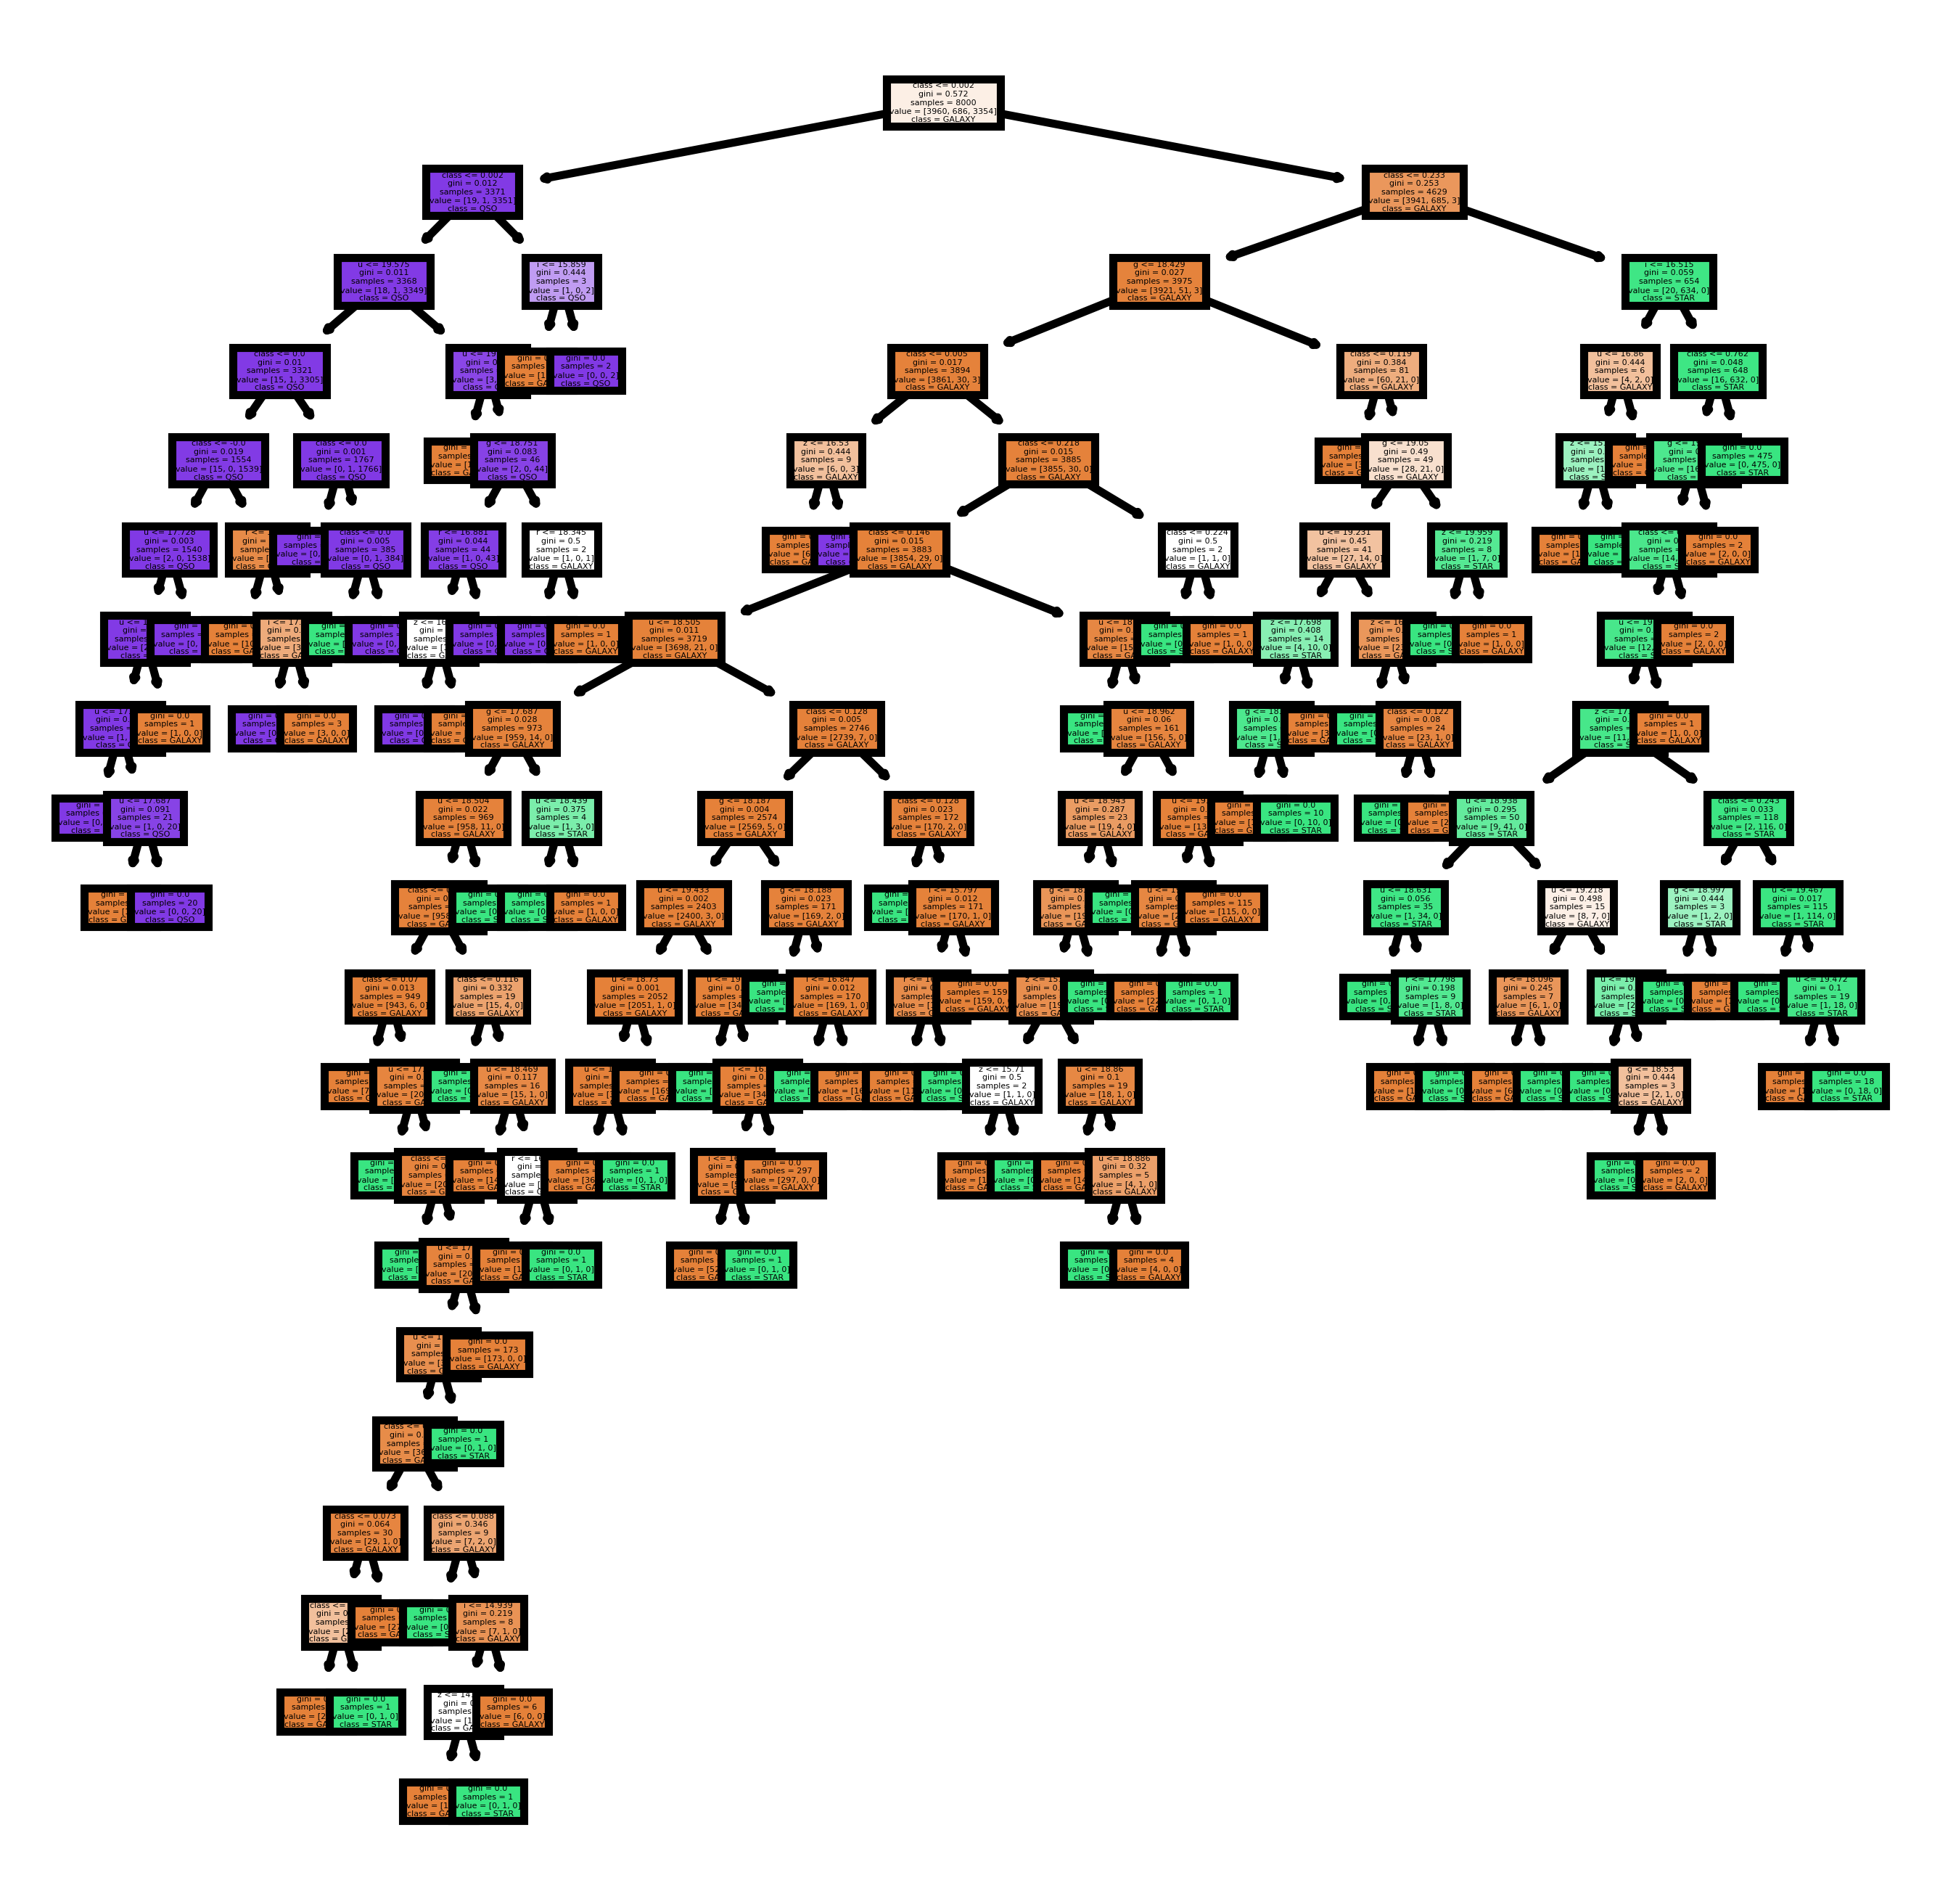

In [91]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 800)
tree.plot_tree(dtree, 
feature_names = list(df.columns.values),
class_names=['GALAXY','STAR','QSO'],
filled = True);
fig.savefig('decision_tree.png')

### 9: Try implementing a random forest technique. Sample code is provided in this article: https://www.datacamp.com/community/tutorials/random-forests-classifier-python. Did it improve performance over the simpler decision tree?

In [92]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1038
         QSO       0.99      0.96      0.97       164
        STAR       1.00      1.00      1.00       798

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [93]:
print(confusion_matrix(y_test,predictions))

[[1032    2    4]
 [   7  157    0]
 [   1    0  797]]


The performance for the quasar data significantly improved between the decision tree and the random forest. Quasar data on the decision tree had a score of 0.94, while on the random forest it had a score of 0.97. 